# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [11]:
# Import the appropriate libraries with aliases

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# Create two new dataframes
north_df=pd.read_csv('NorthCallCenter.csv')
south_df=pd.read_csv('SouthCallCenter.csv')

north_df
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [7]:
#Code Used:
north_df['Rep ID'].unique()

array(['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy',
       'Xander'], dtype=object)

#### EDA Question 1B:  How many reps are in the South branch?  

In [8]:
#Code Used:
south_df['Rep ID'].unique()

array(['Kate', 'Eric', 'Susan', 'Alice', 'Sandy', 'Karl', 'Randy',
       'George', 'Helga', 'Josh', 'Sharon'], dtype=object)

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [20]:
#Code Used:
north_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [21]:
#Code Used:
south_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [50]:
# Code Used:

df=north_df.append(south_df) #appending the 2 dataframes together

df.groupby('Time Block').sum() #adding the number of calls during each time frame

/var/folders/x3/f5m3jc194z74jv3s7_z7szg80000gn/T/ipykernel_25955/2385158943.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=north_df.append(south_df) #appending the 2 dataframes together
/var/folders/x3/f5m3jc194z74jv3s7_z7szg80000gn/T/ipykernel_25955/2385158943.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Time Block').sum() #adding the number of calls during each time frame


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Time Block,,,,,,,,
10:00 AM,10665,4,4,994,194,103.0,303,99
11:00 AM,6796,2,1,565,100,54.0,166,56
12:00 PM,17020,3,1,1202,225,135.0,364,120
1:00 PM,5363,1,0,399,75,38.0,115,40
2:00 PM,9957,0,1,643,124,82.0,197,65
3:00 PM,11674,0,1,736,132,94.0,219,73
4:00 PM,8743,0,1,528,109,66.0,163,53
5:00 PM,8031,2,0,437,90,43.0,134,43
9:00 AM,782,4,2,100,20,13.0,32,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 8
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 3.08
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: Yes there is missing data in Incoming Wait Time. I would probably just drop that column

In [51]:
# Code Used
df.isnull().sum()
# Add Additional Cells as needed.


Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       351
During Call Wait Time      0
Calls                      0
dtype: int64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I used strip() to get rid of the trailing whitespace

In [88]:
#Code Used
north_df['Sale'].str.strip()
# Add Additional Cells as needed.

# north_df.loc[north_df['Sale']=='YES']


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
40,40,North,Sales Support,12:00 PM,Incoming,B,Lilly,YES,0,0,10,1,3.0,2,1
47,47,North,Sales Support,10:00 AM,Incoming,A,Amanda,YES,0,0,10,3,4.0,3,1
67,67,North,Sales Support,12:00 PM,Incoming,B,Todd,YES,0,0,9,3,5.0,4,1
69,69,North,Sales Support,12:00 PM,Incoming,A,Andy,YES,0,0,10,1,5.0,2,1
86,86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
87,87,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,12,1,NaN,4,1
99,99,North,Sales Support,10:00 AM,Outgoing,A,Andy,YES,0,0,12,2,NaN,2,1
108,108,North,Sales Support,11:00 AM,Outgoing,B,Lilly,YES,0,0,8,3,NaN,2,1
220,220,North,Product Support,4:00 PM,Outgoing,A,Cam,YES,0,0,8,1,NaN,3,1
227,227,North,Product Support,4:00 PM,Outgoing,B,Brent,YES,0,0,10,2,NaN,4,1


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: I'm not seeing any duplicates in my data. I would remove them using .drop_duplicates

In [65]:
#Code Used
df.duplicated().sum()
# Add Additional Cells as needed.

0

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I dropped Unnamed: 0 and Incoming Wait time because they seemed unnecessary and/or they had a lot of nulls.

In [70]:
#Code Used
df.drop(['Unnamed: 0', 'Incoming Wait Time'], axis=1)
# Add Additional Cells as needed.

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [ ]:
# Create dataframe for the entire company named df
# Already done on EDA #3


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent:37
- South Branch = Eric: 35


In [91]:
# Code Used
df.groupby(['Branch', 'Rep ID']).sum()
# Add Additional Cells as needed.

/var/folders/x3/f5m3jc194z74jv3s7_z7szg80000gn/T/ipykernel_25955/1436946512.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Branch', 'Rep ID']).sum()


Unnamed: 0  Lost Call  Abandoned  Busy Minutes  \
Branch Rep ID                                                   
North  Amanda        2666          0          1           229   
       Andy          2494          0          3           228   
       Brent         4840          0          1           362   
       Cam           2746          1          0           233   
       Duke          2999          2          0           292   
       Joe           3178          0          0           256   
       Lilly         3375          0          2           307   
       Todd          4252          1          0           296   
       Xander        3340          1          0           244   
South  Alice         3637          0          0           199   
       Eric          5039          0          0           361   
       George        4620          0          0           298   
       Helga         5236          0          2           292   
       Josh          3960          3          0           260   
       Karl          4532          1          0           287   
       Kate          4615          0          0           291   
       Randy         4576          3          1           320   
       Sandy         4694          1          0           325   
       Sharon        4226          1          1           257   
       Susan         4006          2          0           267   

               Not Ready Minutes  Incoming Wait Time  During Call Wait Time  \
Branch Rep ID                                                                 
North  Amanda                 43                12.0                     60   
       Andy                   43                36.0                     65   
       Brent                  71                17.0                    117   
       Cam                    46                32.0                     66   
       Duke                   56                39.0                     85   
       Joe                    49                36.0                     81   
       Lilly                  59                37.0                     88   
       Todd                   58                21.0                     97   
       Xander                 44                20.0                     68   
South  Alice                  46                15.0                     58   
       Eric                   54                47.0                    112   
       George                 53                41.0                     87   
       Helga                  58                36.0                     95   
       Josh                   50                31.0                     83   
       Karl                   61                26.0                     85   
       Kate                   61                37.0                     83   
       Randy                  66                47.0                     98   
       Sandy                  60                34.0                    100   
       Sharon                 38                29.0                     77   
       Susan                  53                35.0                     88   

               Calls  
Branch Rep ID         
North  Amanda     23  
       Andy       23  
       Brent      37  
       Cam        24  
       Duke       29  
       Joe        26  
       Lilly      30  
       Todd       29  
       Xander     24  
South  Alice      20  
       Eric       35  
       George     29  
       Helga      31  
       Josh       26  
       Karl       28  
       Kate       29  
       Randy      33  
       Sandy      32  
       Sharon     25  
       Susan      26

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = .03
- South Branch = .01
- Company Wide = .02
- Do any of these fall out of the optimal range of 2-5%? South Branch is under the Optimal Range

In [105]:
# Code Used
north_df['Abandoned'].mean()
# Add Additional Cells as needed.

0.02857142857142857

In [106]:
south_df['Abandoned'].mean()

0.012738853503184714

In [114]:
df['Abandoned'].mean()

0.01967799642218247

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 34%: 245
- South Branch = 41%: 314
- Company Wide = 38%: 559

In [129]:
# Code Used
north_df.groupby('Not Ready Minutes',).sum()
# Add Additional Cells as needed.

/var/folders/x3/f5m3jc194z74jv3s7_z7szg80000gn/T/ipykernel_25955/2638004768.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  north_df.groupby('Not Ready Minutes',).sum()


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Incoming Wait Time,During Call Wait Time,Calls
Not Ready Minutes,,,,,,,
1,10900,3,2,840,80.0,251,84
2,11174,1,3,983,106.0,283,98
3,7816,1,2,624,64.0,193,63


In [130]:
south_df.groupby('Not Ready Minutes',).sum()


/var/folders/x3/f5m3jc194z74jv3s7_z7szg80000gn/T/ipykernel_25955/3737657539.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  south_df.groupby('Not Ready Minutes',).sum()


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Incoming Wait Time,During Call Wait Time,Calls
Not Ready Minutes,,,,,,,
1,20168,3,4,1323,151.0,407,131
2,13153,4,0,792,102.0,260,80
3,15820,4,0,1042,125.0,299,103


In [131]:
df.groupby('Not Ready Minutes',).sum()

/var/folders/x3/f5m3jc194z74jv3s7_z7szg80000gn/T/ipykernel_25955/3532131150.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Not Ready Minutes',).sum()


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Incoming Wait Time,During Call Wait Time,Calls
Not Ready Minutes,,,,,,,
1,31068,6,6,2163,231.0,658,215
2,24327,5,3,1775,208.0,543,178
3,23636,5,2,1666,189.0,492,166


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 1.914
- South Branch in seconds = 1.911
- Company Wide in seconds = 1.912


In [133]:
# Code Used 
df['Not Ready Minutes'].describe()

count    559.000000
mean       1.912343
std        0.821644
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Not Ready Minutes, dtype: float64

In [134]:
north_df['Not Ready Minutes'].describe()

count    245.000000
mean       1.914286
std        0.771416
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Not Ready Minutes, dtype: float64

In [135]:
south_df['Not Ready Minutes'].describe()

count    314.000000
mean       1.910828
std        0.860016
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Not Ready Minutes, dtype: float64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart because there were only 4 values and it showed a good representation of a comparison.

/var/folders/x3/f5m3jc194z74jv3s7_z7szg80000gn/T/ipykernel_25955/1953159987.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


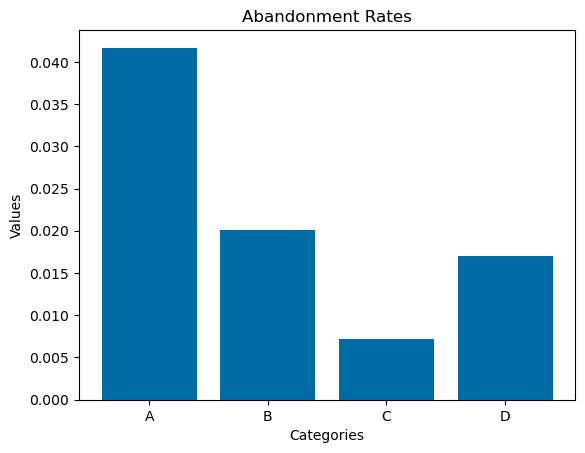

In [223]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

# print(abandonment_rates)

#Your Code Here:

categories=list(abandonment_rates.keys())
values=list(abandonment_rates.values())


plt.bar(categories, values)

plt.title('Abandonment Rates')
plt.xlabel('Categories')
plt.ylabel('Values') 
plt.show()


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a barchart because it gave a good representation of the different values for each rep.

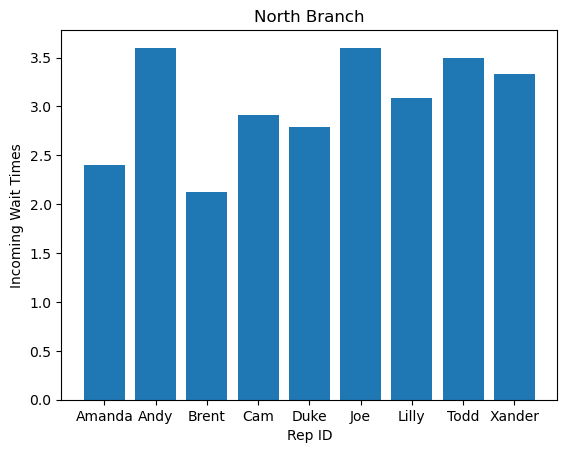

In [176]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

plt.bar(north_plt['Rep ID'], north_plt['Incoming Wait Time'])


plt.title('North Branch')
plt.xlabel('Rep ID')
plt.ylabel('Incoming Wait Times') 

plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: This seemed like 2 values so a bar chart seemed to be the best option

{'Incoming': 51}


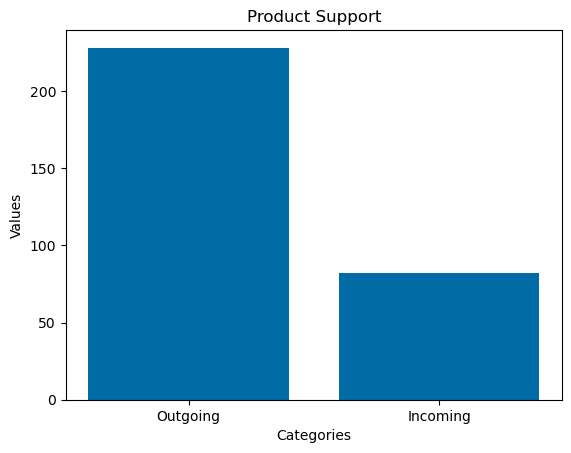

In [238]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

# print(complaints)

#Your Code Here:

categories=list(product_support.keys())
values=list(product_support.values())


plt.bar(categories, values)

plt.title('Product Support')
plt.xlabel('Categories')
plt.ylabel('Values') 
plt.show()


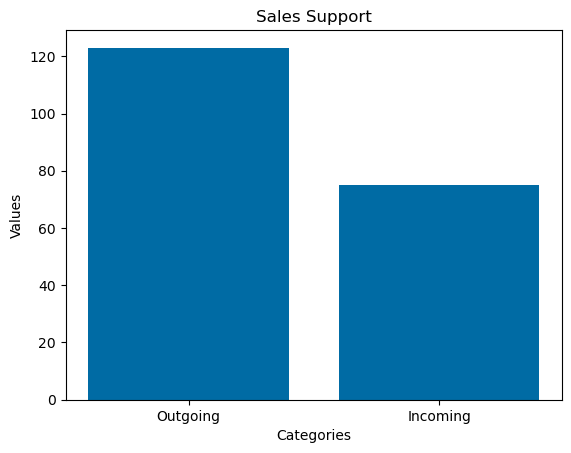

In [236]:
categories=list(sales_support.keys())
values=list(sales_support.values())


plt.bar(categories, values)

plt.title('Sales Support')
plt.xlabel('Categories')
plt.ylabel('Values') 
plt.show()

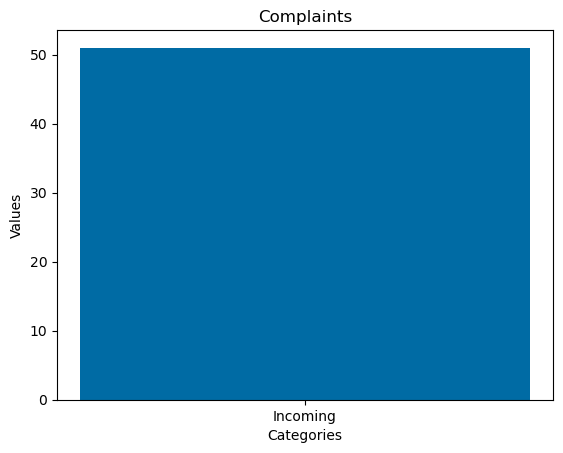

In [237]:
categories=list(complaints.keys())
values=list(complaints.values())


plt.bar(categories, values)

plt.title('Complaints')
plt.xlabel('Categories')
plt.ylabel('Values') 
plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
North Branch has an abandonment rate of 2.9%, 1.914 sec average speed, and 34% answering speed. South branch has an abandonment rate of 1.3, 1.911 sec average speed, and 41% answering speed. From this data I would choose the North branch since they have a higher abandonment rate, longer speed, and lower answering speed.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
North branch has 9 reps as opposed to South branches 11, plus their reps have lower call numbers. I would say North branch of the extra help.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 
I wish I had the resolved information for the complaints since that is just as hel

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: